# Notes for a "Getting started" workshop

We're going to run through a series of steps and challenges. If you get stuck at any point please feel free to ask one of our volunteers for help!

## 1. Install Anaconda

### On a JPMC machine

1. Go to https://fastxchange.jpmchase.net/software/#home
2. Search for "Anaconda"
3. Install "Anaconda for Python 3.x"

### On your own machine

Go to https://www.continuum.io/downloads/


## 2. Run Jupyter Notebook

Jupyter is a tool for interacting with code and data in a variety of languages. Today (obviously) we're using it with Python 3, but you can find out more about what it can do at http://jupyter.org/

### On a JPMC machine

1. Start > All Programs > Anaconda 3 > Anaconda Prompt
2. Type `jupyter notebook`

### On your own machine

Just from Start > All Programs > Anaconda > Jupyter (or similar)


## 3. Get the workshop notebook

1. Download https://joehalliwell.com/


## 4. Jupyter basics

When you started Jupyter a new browser tab should have opened. Click the "New" button and then select "Python" to start a new Python Notebook.

### Challenges

1. Go to the "Help" menu above and run through the "User Interface Tour"
2. Click into the "In" box below and hit `control + enter` to execute it. What happens?
3. Click the "+" button to create a new code block. Type in `1337 + 1337` and hit `control + enter` to evaluate.
4. Click the scissors button to remove it
5. Pop-up documentation by click on the word format and pressing `shift + tab`. You can use the controls in the top-right of the pop-up to see more info.


In [ ]:
from getpass import getuser
print("{0} RULEZ!!!".format(getuser()))

## 5. Python basics

Practice a bit of Python. Skip this if you're totally on top of the Python thing.

### Challenges

1. Print the result of *multiplying* `1337` by `1337`
2. Create a list called `adjectives` containing *five* adjectives
3. Print the length of `adjectives`
3. Import the `choice` function from the `random` standard library; use it to print a random adjective
4. Do the same with `nouns` a list of nouns
5. Define a function `codename` to return a random combination of adjective and noun
6. (**Tricky!**) Generate five *distinct* codenames

In [ ]:
####################################################################
# SPOILER ALERT! THIS SECTION IS TO BE REMOVED BEFORE DISTRIBUTION #
####################################################################

print(1337 * 1337)

adjectives = ["guilty", "horrid", "intrepid", "jilted", "kingly"]

print(len(adjectives))

from random import choice
print(choice(adjectives))

nouns = ["apple", "bacon", "carbon", "dinghy", "echo"]
print(choice(nouns))

def codename():
    return choice(adjectives) + " " + choice(nouns)
    
print(codename())

codenames = set()
while len(codenames) < 5:
    codenames.add(codename())
print(codenames)

## 6. Pandas

Pandas is a widely-used library for working with tables of data called "dataframes". You can find out more at http://pandas.pydata.org/

### Challenges

1. Run the snippet below to read in the "Titanic" dataset from the interwebs. Do you understand what each line is doing?
2. Run `titanic.head()` to look at the first few rows of the dataframe
3. Experiment with the `sample()`, `info()` and `describe()` methods. Remember that you can use `shift + tab` to access documentation!
4. Why are the counts in the `info()` output different for different fields?
4. The average age in the dataset can be found via `titanic['age'].mean()`, but what is the sum of eveyone's ages?
4. You can filter the dataset to just women via `titanic[titanic['sex'] == 'female']`. What's the average age of women in the dataset?
5. (**Tricky!**) What's the average age of female survivors?
5. What is `titanic.groupby(['sex', 'survived']).describe()` showing you?

In [ ]:
import pandas as pd
import os

pd.set_option('max_rows', 50)
os.environ['HTTPS_PROXY'] = 'proxy.jpmchase.net:8443' # Comment this out if you're running it on your own machine

url = "https://raw.githubusercontent.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
titanic = pd.read_csv(url)

titanic.head()

In [ ]:
####################################################################
# SPOILER ALERT! THIS SECTION IS TO BE REMOVED BEFORE DISTRIBUTION #
####################################################################

# Look at the first few entries
titanic.sample(n=3)

# The 'all' is required to include stats for non-numeric columns
titanic.describe(include='all')

# Sum of ages
titanic['age'].sum()

# Annoyingly the brackets are essential
titanic[(titanic['sex'] == 'female') & (titanic['survived'] == 1)]['age'].mean()

titanic.groupby(['sex', 'survived']).describe()


## 7. Matplotlib and Seaborn

There are a lot of different Python libraries for visualising data. **Matplotlib** is one of the most powerful and widely used. In fact, as we'll see it's integrated with pandas! We're just going to be doing some basic charting, but you can see more of its capabilities at https://matplotlib.org/gallery.html.

**Seaborn** gives matplotlib a nicer default style and provides some utility functions. You can read more about using it with pandas here: http://seaborn.pydata.org/tutorial/categorical.html

### Challenges

1. Run the snippets below to do some basic charting
2. Take a look at the pandas visualisation guide https://pandas.pydata.org/pandas-docs/stable/visualization.html
3. IDEAS PLEASE!



In [ ]:
import seaborn as sns
%matplotlib inline

# Pandas has built in methods for simple visualisations
titanic["sex"].value_counts().plot(kind="bar", title="Sex of passengers") 

In [ ]:
# Seaborn offers concise ways to construct complex charts
sns.barplot(x="embarked", y="survived", hue="sex", data=titanic)
sns.pairplot(x_vars=["age"], y_vars=["fare"], data=titanic, hue="embarked", size=5)

In [ ]:
grid = sns.FacetGrid(titanic, col='survived', row='pclass', size=2.2, aspect=1)
grid.map(plt.hist, 'age', bins=20)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# You can also use matplotlib directly
plt.hist(titanic['fare'], label="fare")

X = np.linspace(0, 600)
for d in np.linspace(100, 600, 10):
    plt.plot(X, d + 50 * np.sin(X / 50), linestyle='dotted', linewidth=10)
    
plt.title("Histogram of fares plus squiggles")

## 8. Scikit Learn

Scikit Learn (http://scikit-learn.org) is a brilliant library that contains a bunch of textbook machine learning algorithms, plus machinery for running and evaluating experiments. We're going to use it to build a simple model called a decision tree.

In [ ]:
# Import scikit learn
from sklearn import tree, metrics, preprocessing


The first thing we need to do is to tidy up our data and convert it numerical form.

In [ ]:
trainX = titanic[["pclass", "sex", "age", "fare", "cabin", "embarked"]].copy()
trainY = titanic["survived"].copy()

# First we're going to deal with some missing data
# See https://pandas.pydata.org/pandas-docs/stable/missing_data.html 

# Here's the problem...
problems = trainX.isnull().any(axis=1)
print(trainX[problems].head())
print("Problem rows: {0}".format(trainX.isnull().any(axis=1).sum()))

# Replace missing ports of embarkation with 'U'
trainX['embarked'] = trainX['embarked'].fillna('U') # For unknown

# Replace missing ages with the median age
medianAge = trainX['age'].dropna().median()
trainX['age'] = trainX['age'].fillna(medianAge)

# Replace missing cabins with 'U' and strip back to deck letter
trainX['cabin'] = trainX['cabin'].fillna('U')
trainX['cabin'] = trainX['cabin'].map(lambda cabin: cabin[0])

# Check that it's fixed
print("-" * 80)
print(trainX[problems].head())
print("Problem rows: {0}".format(trainX.isnull().any(axis=1).sum()))

Now we're going to convert the "categorical" or "nominal" data into numbers. For the decision tree classifier we are going to train it's okay to just replace each category with a code number. We can do this automatically with Scikit Learn's LabelEncoder.

In [ ]:
def encode(df, col):
    encoder = preprocessing.LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    return encoder

# Encode the categorical fields
encoders = {col: encode(trainX, col) for col in ('cabin', 'embarked', 'sex')}

# Show the encoders
for col, enc in encoders.items():
    print(col, {c:enc.transform([c])[0] for c in enc.classes_})

trainX.sample(n=5)

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3)
model = clf.fit(trainX, trainY)

In [ ]:
import graphviz # conda install python-graphviz

dot = tree.export_graphviz(clf, out_file=None, 
                         feature_names=trainX.columns,  
                         class_names=['died', 'survived'],  
                         filled=True, rounded=True,  
                         special_characters=True)
graphviz.Source(dot)

In [ ]:
print("Accuracy on training data:", clf.score(trainX, trainY))

# TODO: Do a proper train/test split
testX = clf.predict(trainX)
testY = trainY

print(metrics.classification_report(testX, testY))
print(metrics.confusion_matrix(testX, testY))

## 9. Over to you!

- Would a one-hot encoding be better? http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
- What's the best tree depth for controlling over-fitting?
- Can you use SciKit's built in cross-validation/model selection to figure that out?
- Try visualising the decision surface: http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py 


## 10. References

- Intro to pandas: http://synesthesiam.com/posts/an-introduction-to-pandas.html
- Cheatsheets: https://startupsventurecapital.com/essential-cheat-sheets-for-machine-learning-and-deep-learning-researchers-efb6a8ebd2e5 
- Titanic tutorials: https://www.kaggle.com/c/titanic#tutorials



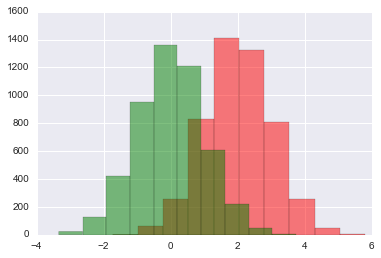

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Y = np.random.choice([0,1], size=10000)
X = np.random.normal(Y * 2)

df = pd.DataFrame(np.stack((X,Y)).transpose(), columns="x label".split())

plt.hist(df[df['label'] == 1]['x'], color='r', alpha=0.5)
plt.hist(df[df['label'] == 0]['x'], color='g', alpha=0.5)
plt.show()